**Logistic Regression using Sklearn Library and also with Gradient Descent method and compare the result of Slope and Intercept.**

**Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

**Load Dataset**

In [2]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=20)

In [3]:
X.shape, y.shape

((100, 2), (100,))

In [4]:
print(X[:5])
print(y[:5])

[[ 0.51123145 -0.11697552]
 [ 0.06316371 -0.73115232]
 [-0.0425064  -0.7081059 ]
 [-3.2891569  -2.01199214]
 [ 0.1111445   1.63493163]]
[1 1 1 0 1]


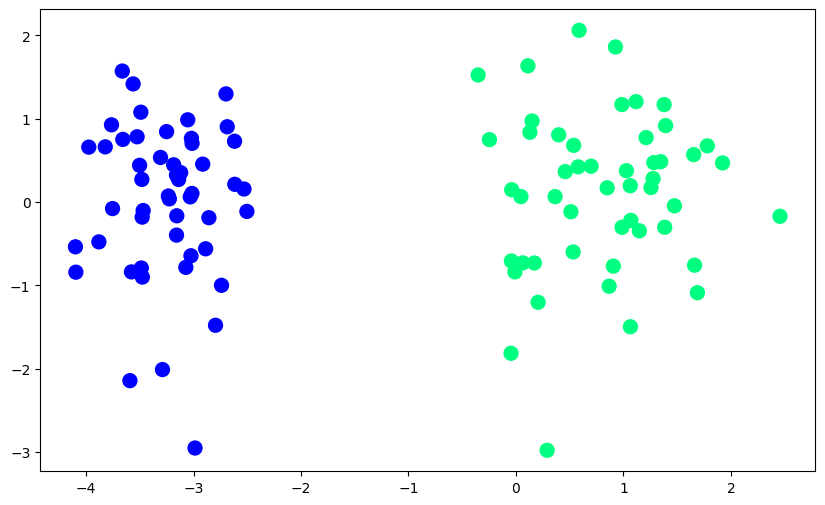

In [5]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

**Sklearn**

In [6]:
from sklearn.linear_model import LogisticRegression

lor = LogisticRegression(penalty='none',solver='sag')
lor.fit(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty='none', solver='sag')

In [7]:
print(lor.coef_)
print(lor.intercept_)

[[4.79411646 0.21231698]]
[5.76083319]


In [8]:
m1 = -(lor.coef_[0][0]/lor.coef_[0][1])
b1 = -(lor.intercept_/lor.coef_[0][1])

In [9]:
print(m1)
print(b1)

-22.579995790673433
[-27.13317259]


In [10]:
x_input = np.linspace(-3,3,100)
y_input = m1*x_input + b1

**Gradient Descent**

In [11]:
def gradientDescent(X,y):

    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.5

    for i in range(5000):
        y_hat = sigmoid(np.dot(X,weights))
        weights = weights + lr*(np.dot((y-y_hat),X)/X.shape[0])

    return weights[1:],weights[0]

In [12]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [13]:
coef_,intercept_ = gradientDescent(X,y)

In [14]:
print(coef_)
print(intercept_)

[4.83926872 0.21182255]
5.83338864905325


In [15]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [16]:
print(m)
print(b)

-22.84586207917223
-27.5390354119192


In [17]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input1 + b

(-3.0, 2.0)

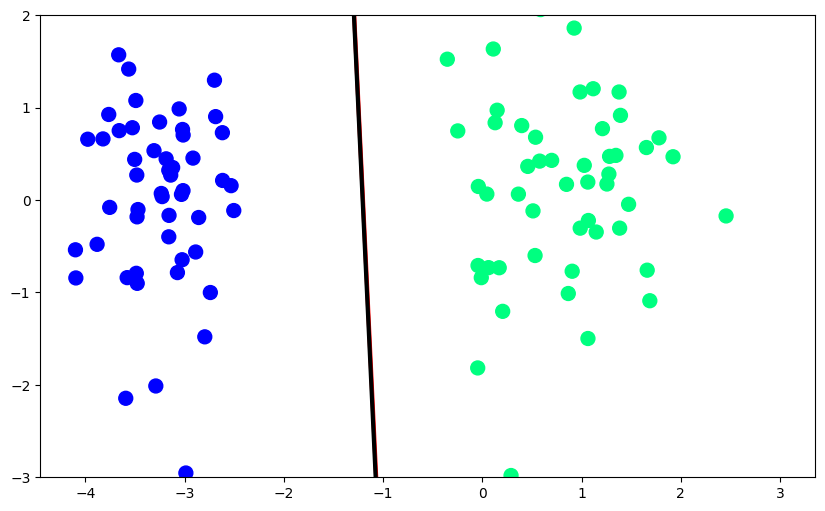

In [18]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)